# Aula 5: Data Visualization

## Histogramas
Quantificando de registros de um conjunto de dados.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('seaborn')

In [56]:
data_set_1 = np.random.randn(200)

(array([  2.,   9.,   9.,  21.,  19.,  40.,  34.,  25.,  23.,  18.]),
 array([-2.57329271, -2.14080277, -1.70831283, -1.27582289, -0.84333295,
        -0.41084301,  0.02164692,  0.45413686,  0.8866268 ,  1.31911674,
         1.75160668]),
 <a list of 10 Patch objects>)

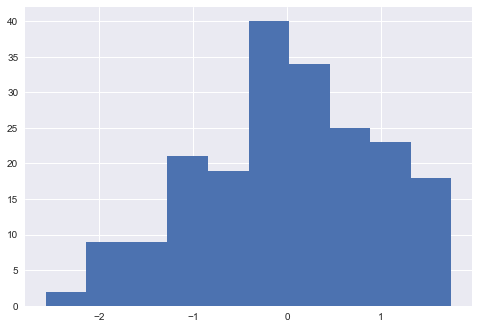

In [57]:
plt.hist(data_set_1)

(array([  2.,   3.,   5.,  14.,  16.,  18.,  13.,  14.,   5.,  10.]),
 array([-2.4129554 , -1.98127016, -1.54958492, -1.11789968, -0.68621444,
        -0.2545292 ,  0.17715605,  0.60884129,  1.04052653,  1.47221177,
         1.90389701]),
 <a list of 10 Patch objects>)

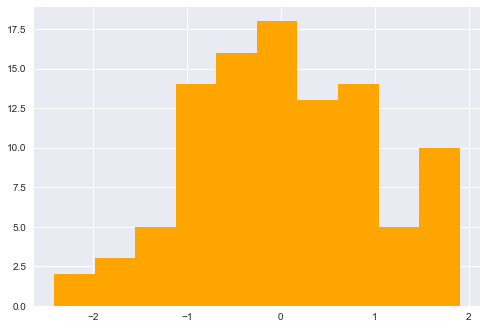

In [58]:
data_set_2 = np.random.randn(100)
plt.hist(data_set_2, color="orange")

Normalizado (density=true) os valores vão de 0 a 1.

(array([ 0.04633005,  0.04633005,  0.09266011,  0.04633005,  0.09266011,
         0.13899016,  0.41697048,  0.23165026,  0.37064042,  0.37064042,
         0.41697048,  0.41697048,  0.23165026,  0.37064042,  0.23165026,
         0.41697048,  0.13899016,  0.09266011,  0.18532021,  0.27798032]),
 array([-2.4129554 , -2.19711278, -1.98127016, -1.76542754, -1.54958492,
        -1.3337423 , -1.11789968, -0.90205706, -0.68621444, -0.47037182,
        -0.2545292 , -0.03868658,  0.17715605,  0.39299867,  0.60884129,
         0.82468391,  1.04052653,  1.25636915,  1.47221177,  1.68805439,
         1.90389701]),
 <a list of 20 Patch objects>)

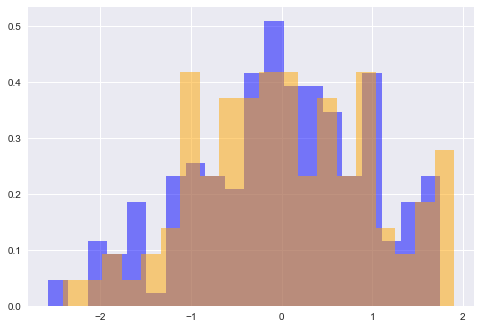

In [59]:
plt.hist(data_set_1, color="blue", alpha=0.5, bins=20, density=True)
plt.hist(data_set_2, color="orange", alpha=0.5, bins=20, density=True)

In [60]:
data_set_3 = np.random.randn(4000)
data_set_4 = np.random.randn(4000)

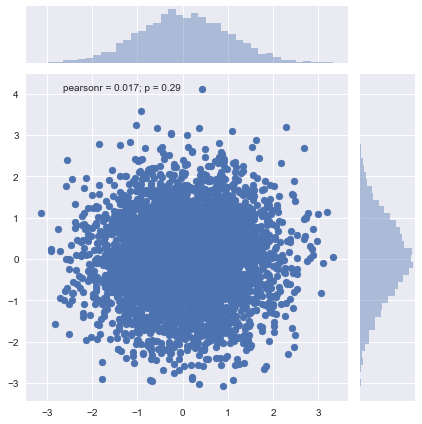

In [61]:
sns.jointplot(data_set_3, data_set_4)

### Box Plots
Diagrama de caixa e violino.

In [65]:
data_set_1 = np.random.randn(200)
data_set_2 = np.random.randn(200)

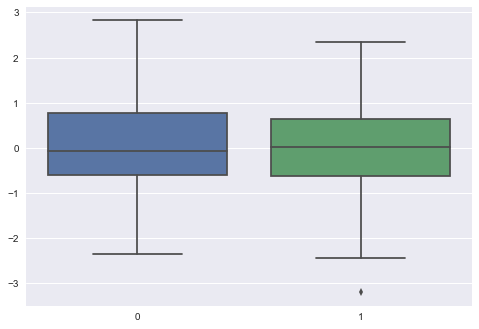

In [66]:
sns.boxplot(data=[data_set_1, data_set_2])

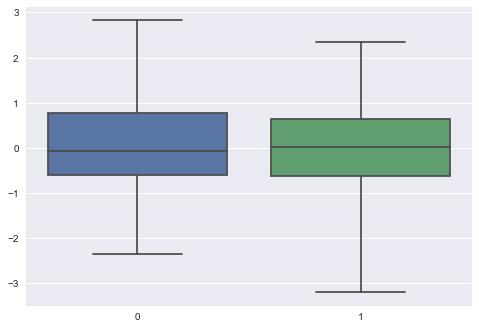

In [67]:
sns.boxplot(data=[data_set_1, data_set_2], whis=np.inf)

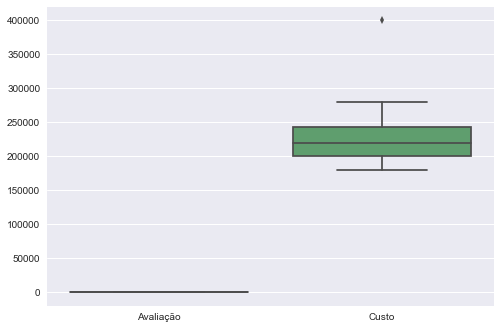

In [68]:
data_frame_1 = pd.read_excel("exemplo.xlsx")
sns.boxplot(data=data_frame_1)

In [69]:
data_frame_1_norm = data_frame_1.copy()
data_frame_1_norm["Custo"] = data_frame_1["Custo"].div(data_frame_1_norm["Custo"].sum(), axis=0)
data_frame_1_norm["Avaliação"] = data_frame_1["Avaliação"].div(data_frame_1_norm["Avaliação"].sum(), axis=0)

In [70]:
data_frame_1_norm

,Filme,Avaliação,Custo
0,Avengers,0.071429,0.074205
1,Avengers 2,0.095238,0.088339
2,Avengers 3,0.095238,0.141343
3,Iron Man,0.047619,0.070671
4,Iron Man 2,0.047619,0.070671
5,Iron Man 3,0.023810,0.084806
6,Thor,0.095238,0.084806
7,Thor 2,0.095238,0.070671
8,Thor 3,0.119048,0.081272
9,Captain America,0.119048,0.063604


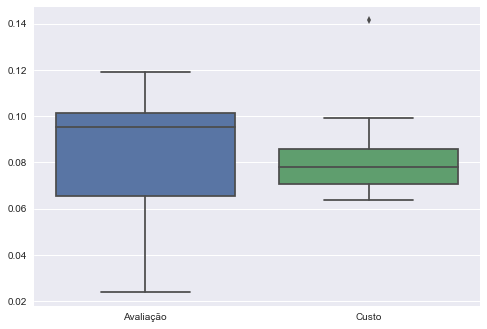

In [71]:
sns.boxplot(data=data_frame_1_norm)

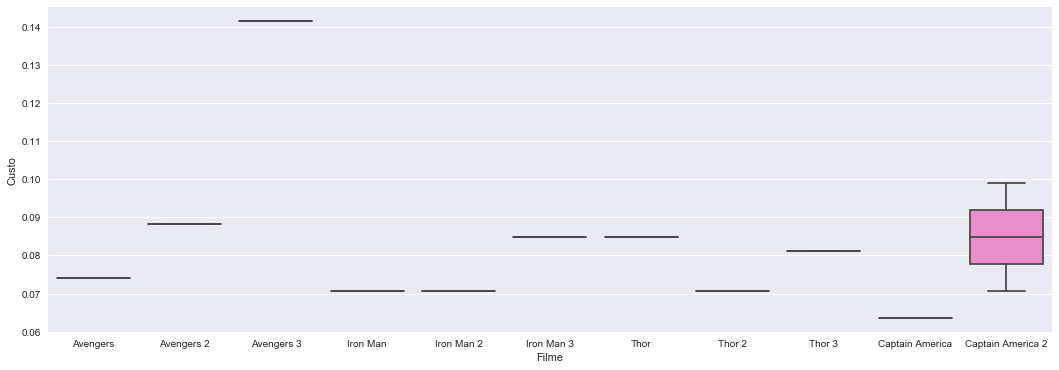

In [72]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 6)
sns.boxplot(ax=ax, data=data_frame_1_norm, y="Custo", x="Filme")
sns.despine()

### Gráficos de Regressão e Scatter Plot
Gráfico padrão com eixo x e eixo y para encontrar correlações

#### Regressão

In [2]:
gorjetas = sns.load_dataset("tips")
gorjetas.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


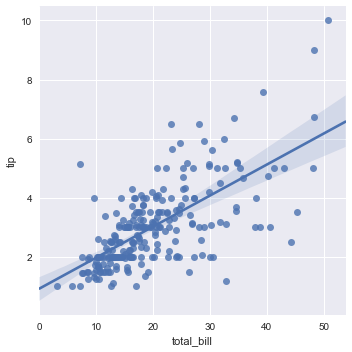

In [5]:
sns.lmplot("total_bill", "tip", gorjetas)

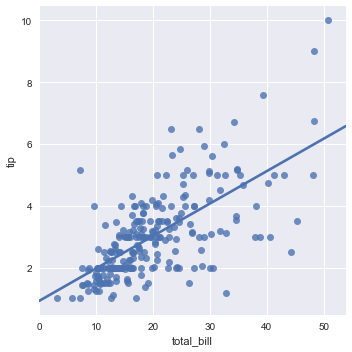

In [6]:
sns.lmplot("total_bill", "tip", gorjetas, ci=None)

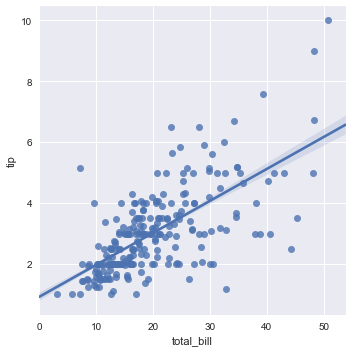

In [7]:
sns.lmplot("total_bill", "tip", gorjetas, ci=50)

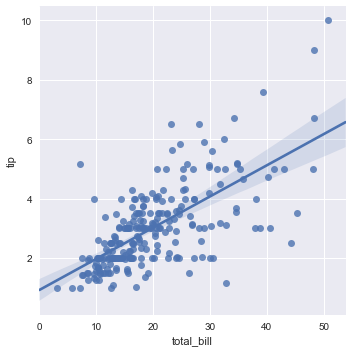

In [9]:
sns.lmplot("total_bill", "tip", gorjetas, ci=95)

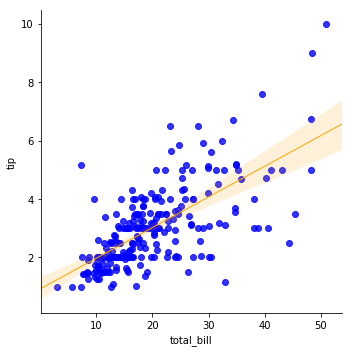

In [28]:
sns.lmplot("total_bill", "tip", gorjetas,
          scatter_kws={"marker":"x", "color":"blue"},
          line_kws={"linewidth":1, "color": "orange"})

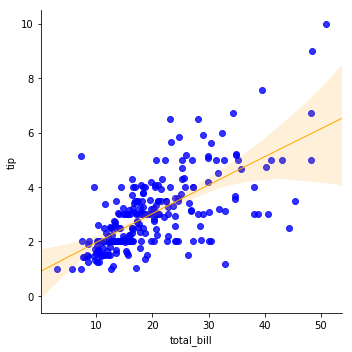

In [29]:
sns.lmplot("total_bill", "tip", gorjetas, order=2,
          scatter_kws={"marker":"x", "color":"blue"},
          line_kws={"linewidth":1, "color": "orange"})

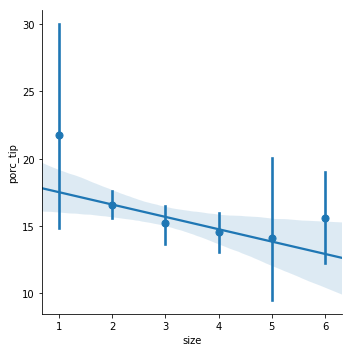

In [30]:
gorjetas["porc_tip"]=100*gorjetas["tip"]/gorjetas["total_bill"]
sns.lmplot("size", "porc_tip", gorjetas, x_estimator=np.mean)

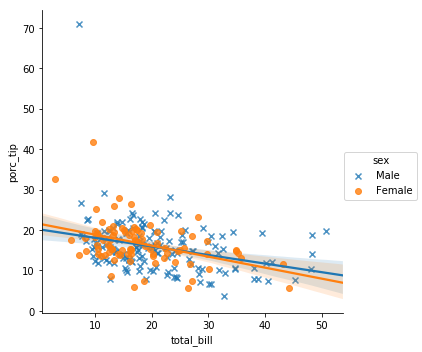

In [31]:
sns.lmplot("total_bill", "porc_tip", gorjetas, hue="sex", markers=["x", "o"])

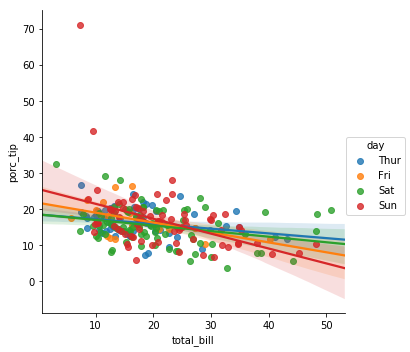

In [32]:
sns.lmplot("total_bill", "porc_tip", gorjetas, hue="day")

#### Scatter Plot e correlação

In [33]:
data_frame_1 = pd.read_excel("exemplo.xlsx")
data_frame_1

,Filme,Avaliação,Custo
0,Avengers,3,210000
1,Avengers 2,4,250000
2,Avengers 3,4,400000
3,Iron Man,2,200000
4,Iron Man 2,2,200000
5,Iron Man 3,1,240000
6,Thor,4,240000
7,Thor 2,4,200000
8,Thor 3,5,230000
9,Captain America,5,180000


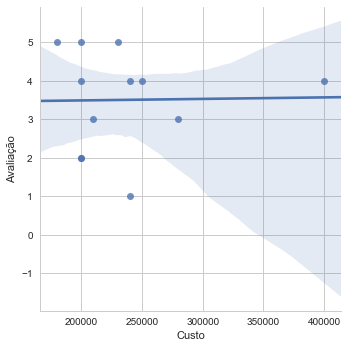

In [49]:
sns.lmplot(data=data_frame_1, y="Avaliação", x="Custo")

### Gráficos de uso geral
Gráfico de linhas e barras

In [34]:
data_frame_2 = pd.read_excel("bilheteria.xlsx")
data_frame_2

,Data,Bilheteria
0,2018-05-01,3.123100e+04
1,2018-05-02,4.497264e+04
2,2018-05-03,6.476060e+04
3,2018-05-04,9.325527e+04
4,2018-05-05,1.342876e+05
5,2018-05-06,1.933741e+05
6,2018-05-07,2.784587e+05
7,2018-05-08,4.009806e+05
8,2018-05-09,5.774120e+05
9,2018-05-10,8.314733e+05


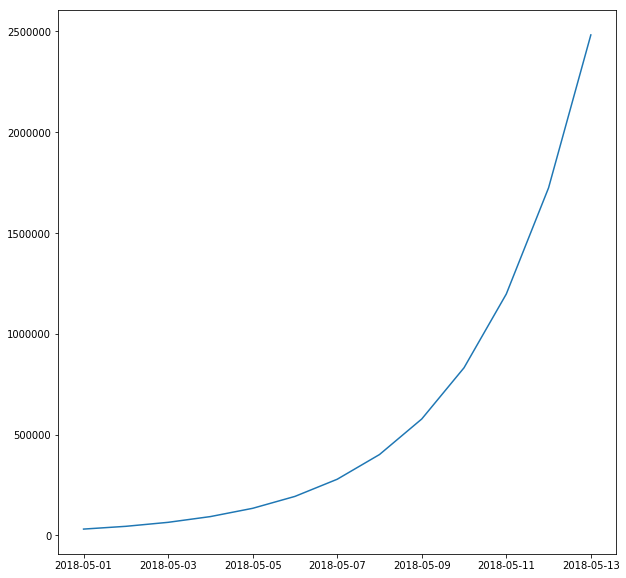

In [35]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
plt.plot(data_frame_2["Data"], data_frame_2["Bilheteria"])

#### Bar Plot

In [36]:
sns.set(style="white")
planetas = sns.load_dataset("planets")
planetas.head(5)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


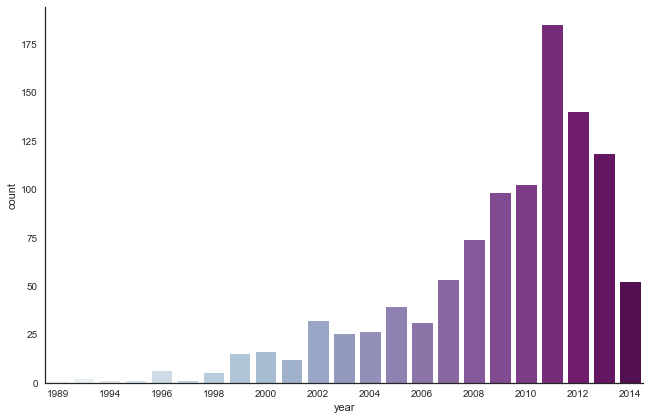

In [37]:
g = sns.factorplot(x="year", data=planetas, kind="count",palette="BuPu", size=6, aspect=1.5)
g.set_xticklabels(step=2)

### Horizontal Bar Plot

In [81]:
batidas = sns.load_dataset("car_crashes").sort_values("total", ascending=False)
batidas_seg = batidas[(batidas["abbrev"] == 'SC') | (batidas["abbrev"] == 'ND') | (batidas["abbrev"] == 'AR')]
batidas_seg.head(5)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
40,23.9,9.082,9.799,22.944,19.359,858.97,116.29,SC
34,23.9,5.497,10.038,23.661,20.554,688.75,109.72,ND
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR


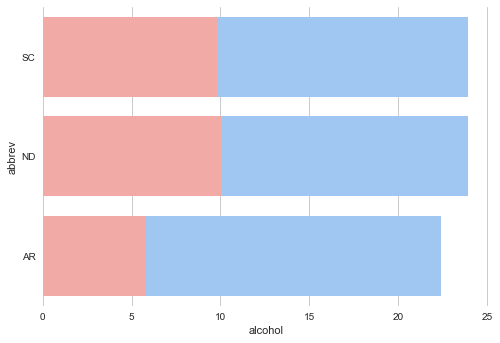

In [84]:
sns.set(style="whitegrid")
sns.set_color_codes("pastel")

#f, ax = plt.subplots(figsize=(6, 15))

sns.barplot(x="total", y="abbrev", data=batidas_seg, label="Total", color="b")
sns.barplot(x="alcohol", y="abbrev", data=batidas_seg, label="Alcohol-involved", color="r")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="", xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

### Heatmaps & Matrizes Clusterizadas
Análise exploratória de atributos

In [40]:
voos = sns.load_dataset("flights")
voos.head(5)

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [41]:
voos_pivoted = voos.pivot("month", "year", "passengers")
voos_pivoted.head(5)

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


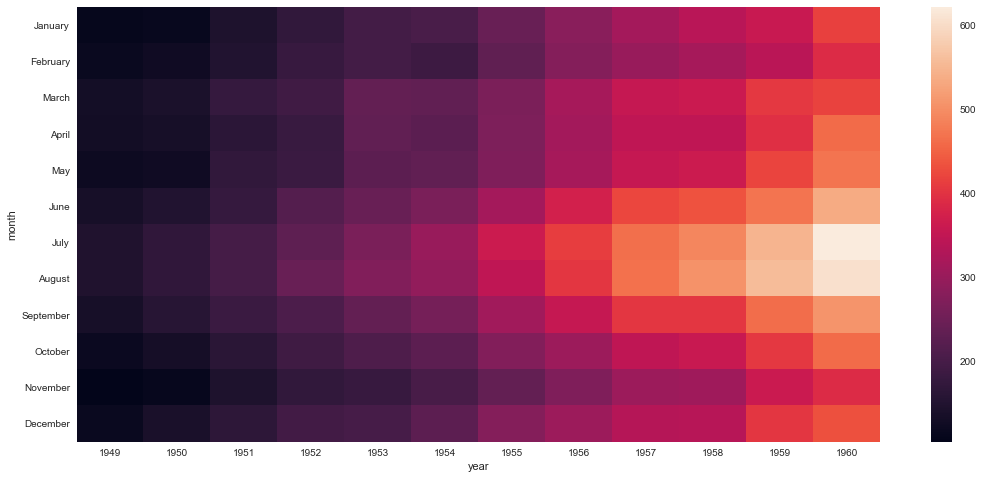

In [42]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 8)
sns.heatmap(voos_pivoted)

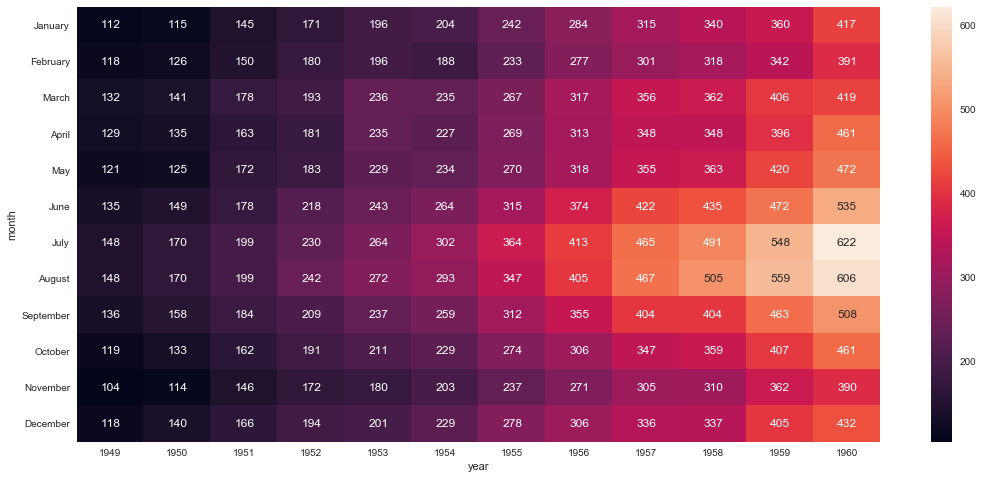

In [43]:
plt.subplots(figsize=(18, 8))
sns.heatmap(voos_pivoted, annot=True, fmt="d")

Centralizar o ano de 1955 e os outros anos divergirem deste ano, de tal forma que em 1955 a cor é branca e sua divergência acima ou abaixo é represnetada por outra cor.

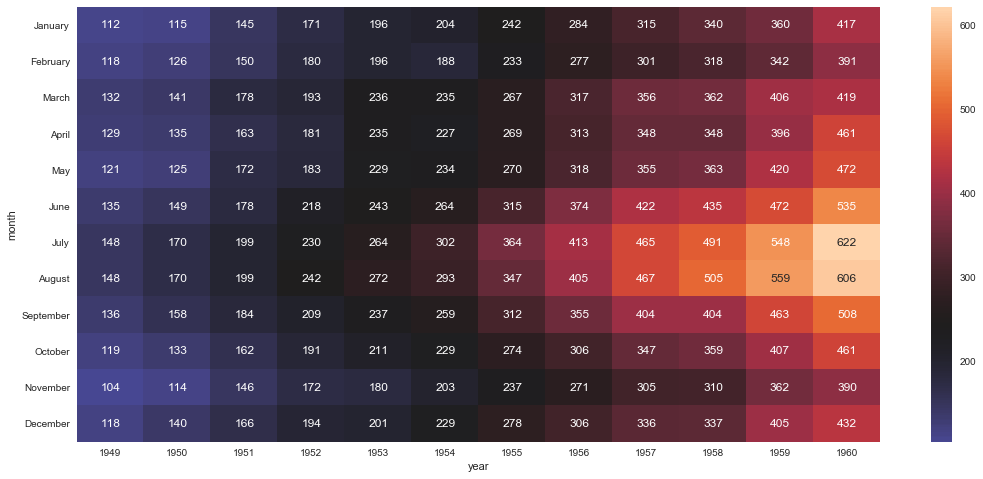

In [44]:
plt.subplots(figsize=(18, 8))
sns.heatmap(voos_pivoted, annot=True, fmt="d", center=voos_pivoted.loc["January", 1955])